## Exploratory Data Analysis of MTA Turnstile

In [1]:
# Loading required libraries

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading Multiple txt Files and Creating Data Frame

weeks = ["200104","200111","200118","200125","200201","200208",
         "200215","200222","200229","200307","200314","200321","200328"]
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'

df_list = []
for week in weeks:
    df_list.append(pd.read_csv(url.format(week)))

# Concatenate all data into one DataFrame that called "mta_df"
mta_df = pd.concat(df_list)

In [3]:
# Checking the first 5 lines

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713


In [4]:
# Checking the last 5 lines

mta_df.tail()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
205757,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,05:00:00,REGULAR,5554,514
205758,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,09:00:00,REGULAR,5554,514
205759,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,13:00:00,REGULAR,5554,514
205760,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,17:00:00,REGULAR,5554,514
205761,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/27/2020,21:00:00,REGULAR,5554,514


In [5]:
# Checking size of dataframe

mta_df.shape

(2677639, 11)

In [6]:
#Checking general info about dataframe

mta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2677639 entries, 0 to 205761
Data columns (total 11 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   C/A                                                                   object
 1   UNIT                                                                  object
 2   SCP                                                                   object
 3   STATION                                                               object
 4   LINENAME                                                              object
 5   DIVISION                                                              object
 6   DATE                                                                  object
 7   TIME                                                                  object
 8   DESC                                                           

In [7]:
# Checking columns names

mta_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [8]:
# Eliminate spaces at columns names

mta_df.columns = mta_df.columns.str.strip()
mta_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [10]:
#Checking duplicates rows and drop.

mta_df.drop_duplicates(subset=None, keep="first", inplace=True)

In [11]:
#Checking null values based on columns

mta_df.isnull().sum()

C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [68]:
#Checking basic descriptive statistics for numerical columns.

mta_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ENTRIES,2677639.0,4.268120e+07,2.183728e+08,0.0,319707.0,1925951.0,6581508.0,2.128896e+09
EXITS,2677639.0,3.496645e+07,1.984193e+08,0.0,142316.5,1132416.0,4479745.5,2.123502e+09


In [13]:
# Adding "TURNSTILE" columns that concatenate 'C/A', 'UNIT', 'SCP'

mta_df["TURNSTILE"] = mta_df["C/A"]+"-"+mta_df["UNIT"]+"-"+mta_df["SCP"]

mta_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,03:00:00,REGULAR,7324295,2482512,A002-R051-02-00-00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,07:00:00,REGULAR,7324305,2482523,A002-R051-02-00-00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,11:00:00,REGULAR,7324371,2482594,A002-R051-02-00-00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,15:00:00,REGULAR,7324587,2482647,A002-R051-02-00-00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,12/28/2019,19:00:00,REGULAR,7324963,2482713,A002-R051-02-00-00


In [14]:
# Creating DATETIME as datetime64 column that concatenate "DATE" and "TIME"

mta_df['DATETIME'] = mta_df["DATE"]+ " " + mta_df["TIME"]

mta_df['DATETIME'] = pd.to_datetime(mta_df['DATETIME'], format='%m/%d/%Y %H:%M:%S')

mta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2677639 entries, 0 to 205761
Data columns (total 13 columns):
 #   Column     Dtype         
---  ------     -----         
 0   C/A        object        
 1   UNIT       object        
 2   SCP        object        
 3   STATION    object        
 4   LINENAME   object        
 5   DIVISION   object        
 6   DATE       object        
 7   TIME       object        
 8   DESC       object        
 9   ENTRIES    int64         
 10  EXITS      int64         
 11  TURNSTILE  object        
 12  DATETIME   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 286.0+ MB


In [15]:
# Creating days of the week

mta_df["DAYS"]= mta_df["DATETIME"].dt.day_name()

In [17]:
# Checking sample 5 rows

mta_df.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,TURNSTILE,DATETIME,DAYS
129372,R107,R305,00-05-00,WTC-CORTLANDT,1,IRT,03/21/2020,17:00:00,REGULAR,247,0,R107-R305-00-05-00,2020-03-21 17:00:00,Saturday
23727,C025,R215,00-03-00,86 ST,R,BMT,02/17/2020,15:00:00,REGULAR,491319,714381,C025-R215-00-03-00,2020-02-17 15:00:00,Monday
148661,R203,R043,00-03-00,WALL ST,45,IRT,03/11/2020,18:00:00,REGULAR,25119,5221,R203-R043-00-03-00,2020-03-11 18:00:00,Wednesday
15706,B020,R263,00-06-00,AVENUE H,BQ,BMT,03/12/2020,04:00:00,REGULAR,29502,228396,B020-R263-00-06-00,2020-03-12 04:00:00,Thursday
58872,N091,R029,02-00-00,CHAMBERS ST,ACE23,IND,01/05/2020,11:00:00,REGULAR,1158967062,352769994,N091-R029-02-00-00,2020-01-05 11:00:00,Sunday


In [19]:
# The process of selecting the required columns

mta_df = mta_df[["STATION","TURNSTILE","DATE","TIME","DATETIME","DAYS","ENTRIES","EXITS"]]
mta_df.head()

,STATION,TURNSTILE,DATE,TIME,DATETIME,DAYS,ENTRIES,EXITS
0,59 ST,A002-R051-02-00-00,12/28/2019,03:00:00,2019-12-28 03:00:00,Saturday,7324295,2482512
1,59 ST,A002-R051-02-00-00,12/28/2019,07:00:00,2019-12-28 07:00:00,Saturday,7324305,2482523
2,59 ST,A002-R051-02-00-00,12/28/2019,11:00:00,2019-12-28 11:00:00,Saturday,7324371,2482594
3,59 ST,A002-R051-02-00-00,12/28/2019,15:00:00,2019-12-28 15:00:00,Saturday,7324587,2482647
4,59 ST,A002-R051-02-00-00,12/28/2019,19:00:00,2019-12-28 19:00:00,Saturday,7324963,2482713


In [58]:
#Controlling maximum and minimum date in dataframe

print("Maximum date: ")
print(mta_df["DATETIME"].max())
print()
print("Minimum date: ")
print(mta_df["DATETIME"].min())

Maximum date: 
2020-03-27 23:59:42

Minimum date: 
2019-12-28 00:00:00


In [25]:
#Checking Unique Station count

len(mta_df["STATION"].unique())

378

In [26]:
#Checking Unique TURNSTILE count

len(mta_df["TURNSTILE"].unique())

4969

In [28]:
#Finding Daily traffic(entries+exits) based on turnstile

mta_entries = mta_df.groupby(["STATION","TURNSTILE","DATE","DAYS"]).ENTRIES.max() - mta_df.groupby(["STATION","TURNSTILE","DATE","DAYS"]).ENTRIES.min()

mta_exits = mta_df.groupby(["STATION","TURNSTILE","DATE","DAYS"]).EXITS.max() - mta_df.groupby(["STATION","TURNSTILE","DATE","DAYS"]).EXITS.min()

mta_entries = mta_entries.reset_index()

mta_exits = mta_exits.reset_index()

mta_entries_exits = pd.merge(mta_entries, mta_exits, how="outer")

mta_entries_exits["TRAFFIC"] = mta_entries_exits["ENTRIES"] + mta_entries_exits["EXITS"]

mta_entries_exits.sample(10)

,STATION,TURNSTILE,DATE,DAYS,ENTRIES,EXITS,TRAFFIC
340299,LAFAYETTE AV,N110-R283-00-05-00,01/21/2020,Tuesday,681,242,923
156138,86 ST,N043-R186-00-03-02,03/22/2020,Sunday,19,57,76
44199,18 AV,E012-R372-00-00-01,02/16/2020,Sunday,774,204,978
181888,AVENUE N,N555-R423-00-00-01,03/19/2020,Thursday,212,88,300
204739,BOWLING GREEN,R202-R042-00-00-00,02/25/2020,Tuesday,163,332,495
207884,BROAD ST,A083-R125-00-00-04,01/16/2020,Thursday,128,1020,1148
64093,28 ST,R229-R143-01-00-03,01/25/2020,Saturday,461,140,601
325582,JKSN HT-ROOSVLT,N324-R018-00-03-01,01/15/2020,Wednesday,2869,2512,5381
6945,116 ST,R257-R182-01-00-00,01/01/2020,Wednesday,413,366,779
119133,57 ST-7 AV,A010-R080-00-00-05,02/27/2020,Thursday,2345,661,3006


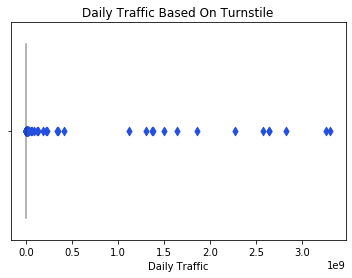

In [29]:
#Boxenplot for daily traffic

ax = sns.boxenplot(x='TRAFFIC', data=mta_entries_exits,palette="bright").set(xlabel='Daily Traffic',title="Daily Traffic Based On Turnstile")

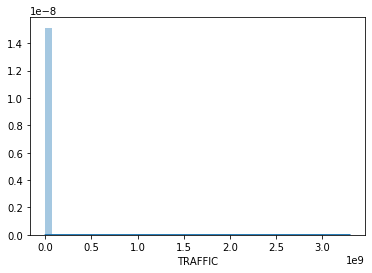

In [30]:
# Distplot for daily traffic

ax = sns.distplot(mta_entries_exits["TRAFFIC"])

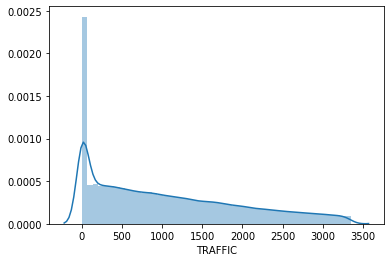

In [31]:
# Finding optimal daily traffic

mta_traffic_under_percentileX = mta_entries_exits[mta_entries_exits["TRAFFIC"]<(mta_entries_exits.TRAFFIC.quantile(0.90))]
ax=sns.distplot(mta_traffic_under_percentileX["TRAFFIC"])

In [32]:
mta_entries_exits["TRAFFIC"].quantile(0.90)

3351.0

In [33]:
mta_traffic_under_percentileX.describe().T

,count,mean,std,min,25%,50%,75%,max
ENTRIES,401883.0,613.352583,610.075107,0.0,98.0,440.0,961.0,3282.0
EXITS,401883.0,457.254940,502.263799,0.0,67.0,289.0,683.0,3349.0
TRAFFIC,401883.0,1070.607523,922.752940,0.0,255.0,876.0,1717.0,3350.0


In [34]:
#Setting median values to giant values

mta_entries_exits["TRAFFIC"][mta_entries_exits["TRAFFIC"] > (mta_entries_exits.TRAFFIC.quantile(0.90))] = mta_entries_exits["TRAFFIC"].median() 

C:\Users\Adnan\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
#Checking new values for "TRAFFIC" column

mta_entries_exits["TRAFFIC"].describe().T

count    446545.000000
mean       1067.306901
std         875.660332
min           0.000000
25%         318.000000
50%        1036.000000
75%        1608.000000
max        3351.000000
Name: TRAFFIC, dtype: float64

In [36]:
mta_entries_exits.sort_values("TRAFFIC", ascending=False).head(10)

,STATION,TURNSTILE,DATE,DAYS,ENTRIES,EXITS,TRAFFIC
20327,14 ST,R128-R105-01-00-00,02/05/2020,Wednesday,1851,1500,3351
406479,SPRING ST,R215-R322-00-00-02,02/05/2020,Wednesday,2920,431,3351
97285,45 ST,C019-R232-00-00-00,02/05/2020,Wednesday,1613,1738,3351
282823,FULTON ST,N098-R028-00-02-01,02/13/2020,Thursday,1680,1671,3351
217155,CANAL ST,N089-R139-00-00-00,01/06/2020,Monday,822,2529,3351
150033,8 AV,H001-R175-00-06-00,02/26/2020,Wednesday,2422,929,3351
342246,LEXINGTON AV/53,N305A-R016-00-03-03,02/26/2020,Wednesday,1053,2298,3351
217628,CANAL ST,N089-R139-00-03-02,01/24/2020,Friday,2405,946,3351
53541,23 ST,N076-R111-00-00-01,01/17/2020,Friday,2049,1302,3351
384573,PATH NEW WTC,PTH22-R540-00-05-06,02/12/2020,Wednesday,2351,1000,3351


In [37]:
# Finding top 5 busiest stations based on traffic

mta_top5 = mta_entries_exits.groupby("STATION").sum().sort_values("TRAFFIC",ascending=False).head(5)
mta_top5 = mta_top5.reset_index()
mta_top5

,STATION,ENTRIES,EXITS,TRAFFIC
0,34 ST-PENN STA,29354056,24118290,12344957
1,FULTON ST,9012989,7368720,8992827
2,23 ST,7145863,6178093,8091664
3,GRD CNTRL-42 ST,11238499,13467602,7898569
4,86 ST,171193377,72621638,7002465


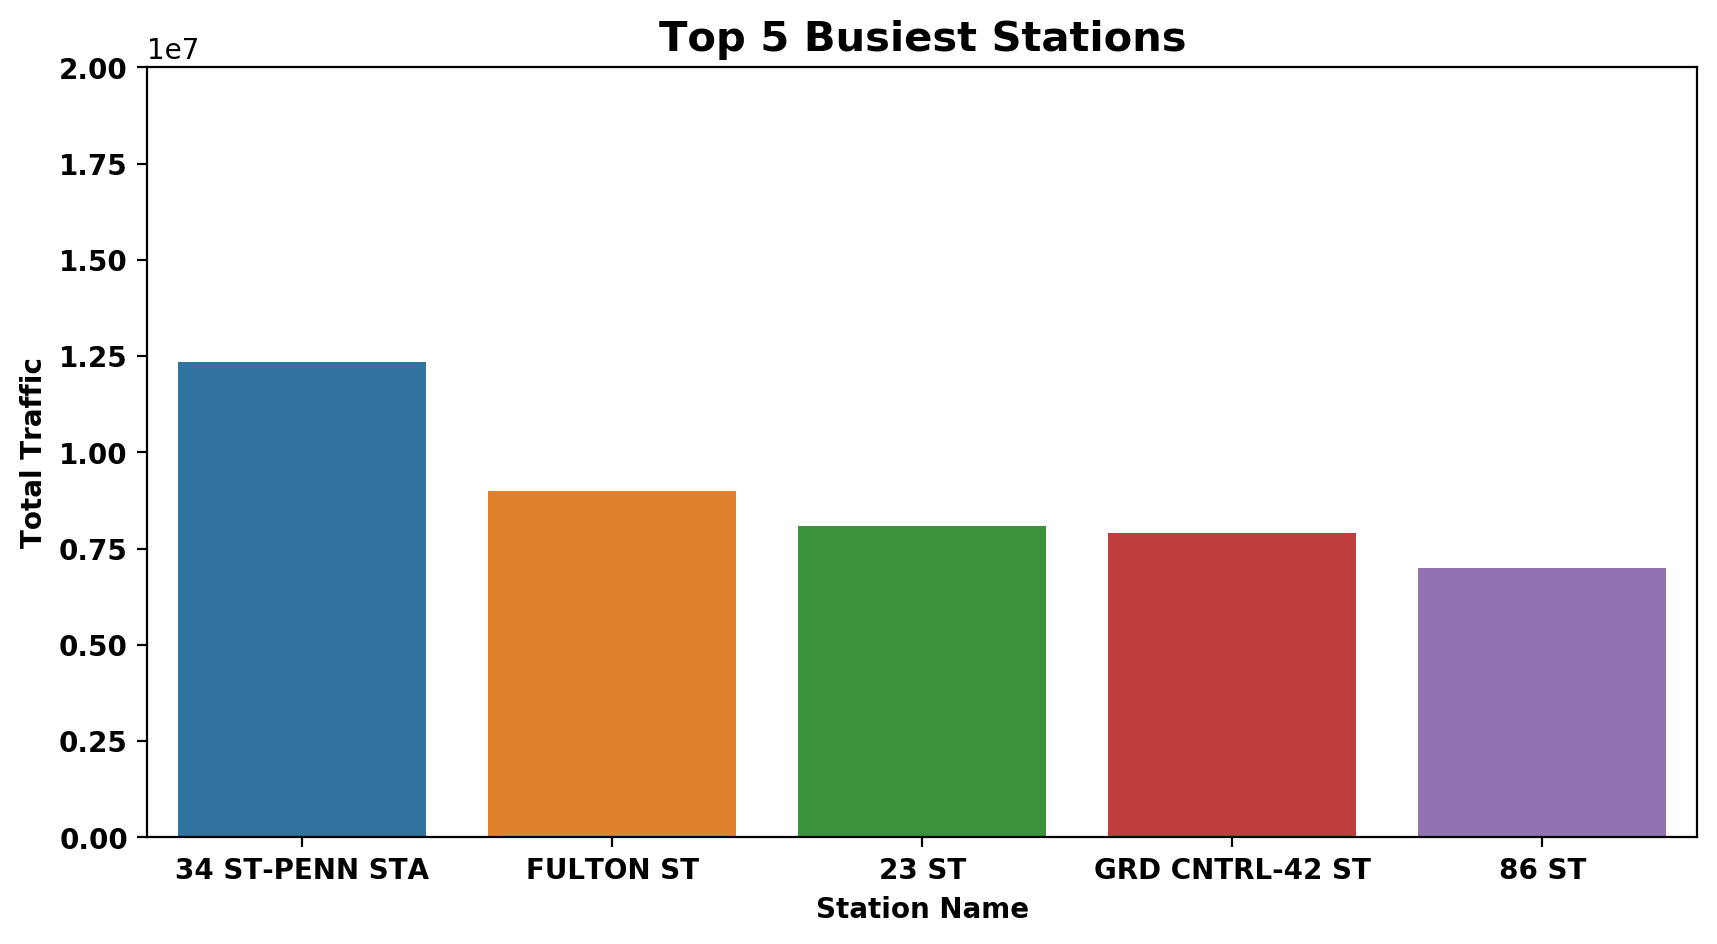

In [66]:
#Barplot for Top 5 Busiest Stations

plt.figure(figsize=(10,5),dpi=200),
plt.style.use('default')
ax = sns.barplot(x="STATION", y="TRAFFIC", data=mta_top5)
plt.title("Top 5 Busiest Stations", weight="bold", c="black", fontsize=15)
plt.xlabel("Station Name",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.ylim(0,20000000)
plt.yticks(weight="bold")
plt.show()

In [47]:
# Finding overall busiest day based on traffic

mta_busiest_day = mta_entries_exits.groupby("DAYS").sum().sort_values("TRAFFIC",ascending=False)
mta_busiest_day = mta_busiest_day.reset_index()
mta_busiest_day

,DAYS,ENTRIES,EXITS,TRAFFIC
0,Tuesday,3729964734,4930978619,77356515
1,Thursday,1383797193,230592902,76922997
2,Friday,2252830148,2537767813,75541110
3,Wednesday,6076650704,5559731467,74719017
4,Monday,2667164789,2926890624,74694880
5,Saturday,200987054,56312929,52960947
6,Sunday,639206766,217542549,44405094


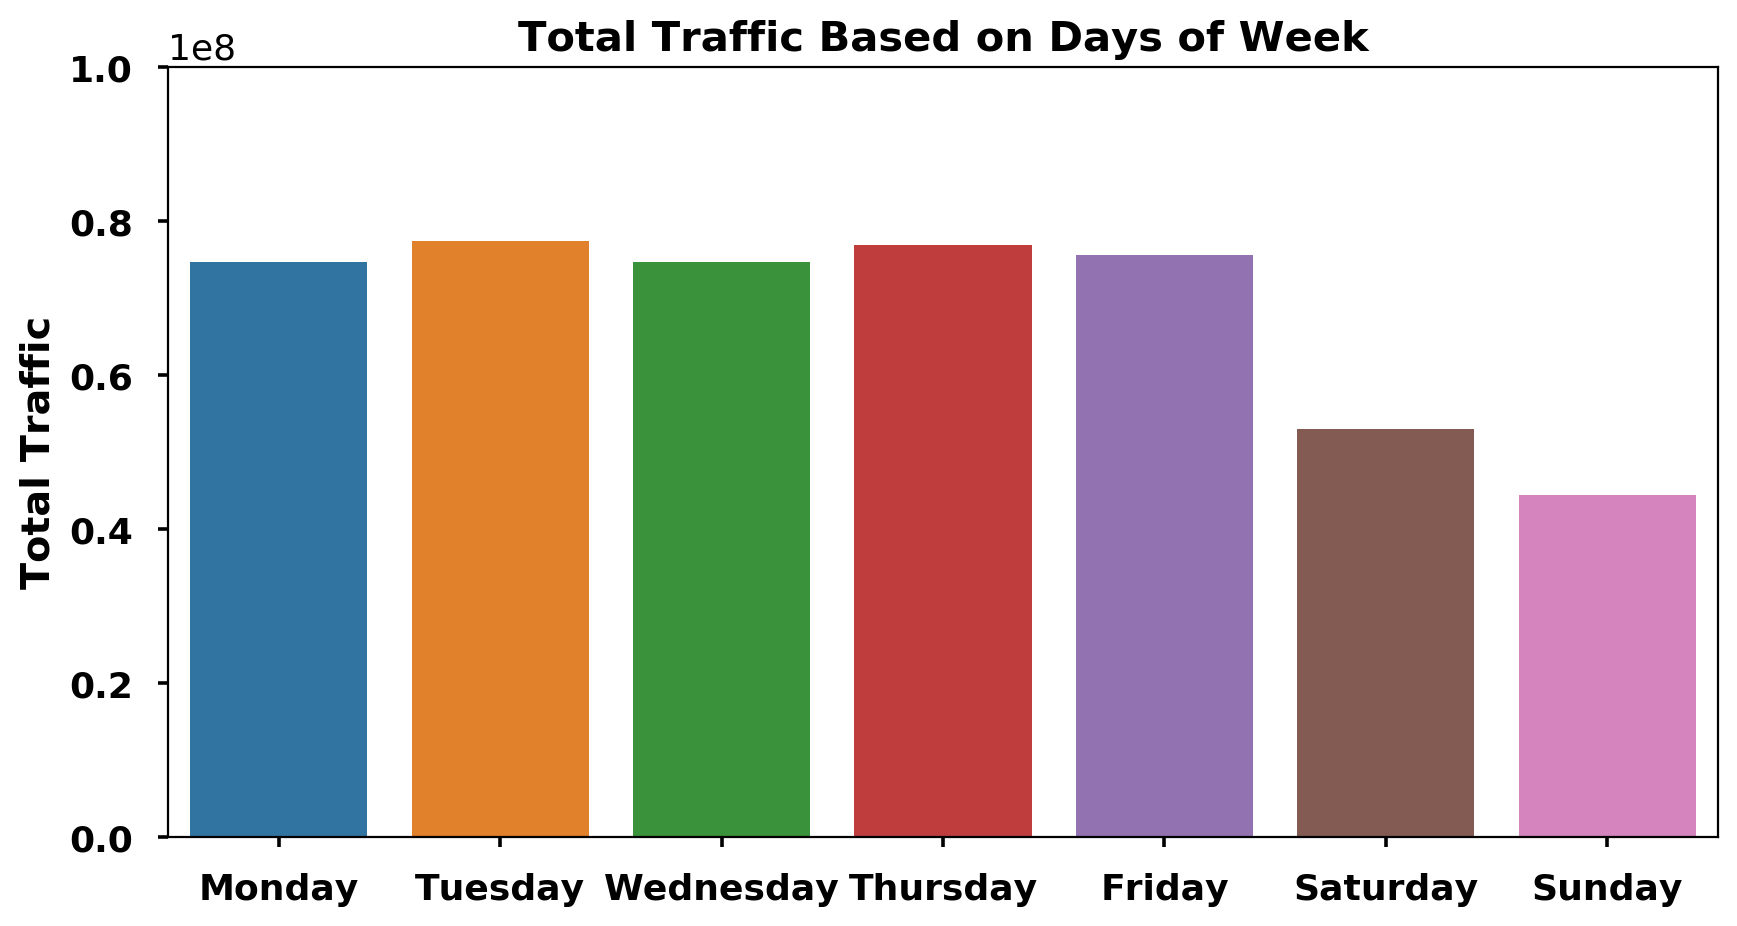

In [64]:
#Barplot for total traffic
plt.figure(figsize=(10,5),dpi=200),
plt.style.use('seaborn-talk')

ax = sns.barplot(x="DAYS",y="TRAFFIC",data=mta_busiest_day, order=["Monday","Tuesday","Wednesday","Thursday",
                                                                       "Friday","Saturday","Sunday"])

plt.title("Total Traffic Based on Days of Week", weight="bold", c="black",fontsize=15)
plt.xlabel("")
plt.ylabel("Total Traffic",weight= "bold")
plt.yticks(weight="bold")
plt.xticks(weight="bold")
plt.ylim(0,100000000)
plt.show()